In [3]:
import glob
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from PIL import Image
from tqdm import tqdm

In [4]:
label_files = glob.glob('./data/*_L.png')
files = glob.glob('./data/*.png')
image_files = list(set(files)-set(label_files))

label_files.sort()
image_files.sort()

len(image_files), len(label_files)

(101, 101)

(960, 720)


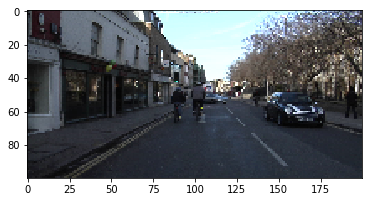

In [7]:
img = Image.open(image_files[0])
print(img.size)
img = img.resize((200, 100))
plt.imshow(img)
plt.show()

In [8]:
values = [np.random.normal(loc=0.0, scale=10.0) for _ in range(len(image_files))]

In [20]:
def plot_img_histogram(img_paths, values, img_size, bins=30, save_canvas=True):
    
    save_canvas_path = './figure.png'
    
    x = np.linspace(np.min(values), np.max(values), num=bins)

    y_cnts = np.zeros(len(x))
    y_imgs = [[] for _ in range(len(x))]

    for img_path, value in zip(img_paths, values):
        for i in range(1, len(x)):
            if x[i-1] <= value and value <= x[i]:
                y_cnts[i] += 1
                y_imgs[i].append(img_path)
                break
                
    plt.figure(figsize=(15, 7))
    plt.bar(x, height=y_cnts, width=1.0)
    for i in range(bins):
        plt.text(x[i], y_cnts[i], int(y_cnts[i]))
    plt.show()
    
    canvas_size_x = int(img_size[0]*len(y_imgs))
    canvas_size_y = int(img_size[1]*np.max(y_cnts))
    canvas_size = (canvas_size_x, canvas_size_y)
    canvas = Image.new('RGB', canvas_size)
    
    for i, img_paths in enumerate(y_imgs):
        for j, img_path in enumerate(img_paths):
            pos_x = i*img_size[0]
            pos_y = canvas_size[1]-j*img_size[1]
            pos = (int(pos_x), int(pos_y))
            img = Image.open(img_path)
            img = img.resize(img_size)
            canvas.paste(img, pos)
            img.close()
    
    plt.figure(figsize=(15, 7))
    plt.imshow(np.array(canvas))
    plt.axis('off')
    plt.show()

    if save_canvas:
        canvas.save(save_canvas_path, 'PNG', quality=100, optimize=True)
        print('output: ', save_canvas_path)

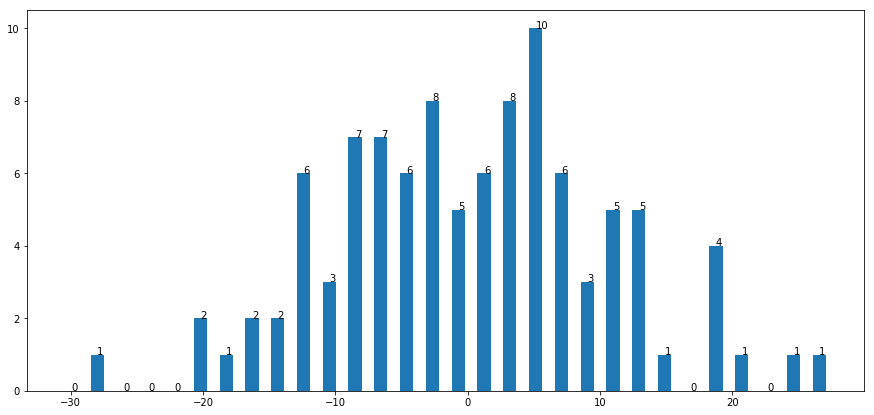

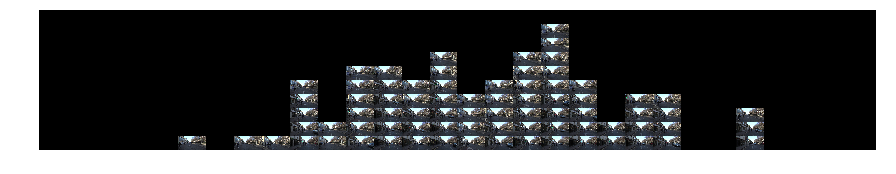

output:  ./figure.png


In [21]:
plot_img_histogram(img_paths=image_files, values=values, img_size=(200, 100))